In [1]:
import tifffile as tf
import matplotlib.pylab as plt
import numpy as np
import sys

sys.path = ["./matchedmyo/","./"] + sys.path
import util

from skimage import transform
import cv2
import matplotlib.pylab as plt
import mach_functions
from sklearn.decomposition import PCA

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
root = "./cropped_cells/"

all_crooped_cells = []
for i in [a for a  in os.listdir(root) if a[-3:] == "tif"]:
     image = util.ReadImg(root+i).astype(np.uint8)
     image = mach_functions.PreProcessCroppedCells(image)
     all_crooped_cells.append(image)

In [4]:
# stack images into one array
total_image = all_crooped_cells[0].reshape(75*75)
#print (total_image.shape)
#$for i in [3,4]:
for i in np.arange(1, len(all_crooped_cells)):
    new = all_crooped_cells[i].reshape(75*75)
    #print (new.shape)
    total_image = np.vstack((new,total_image))

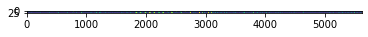

In [5]:
plt.imshow(total_image)

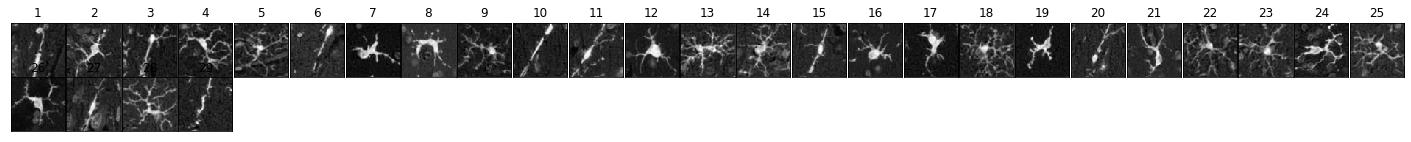

In [6]:
mach_functions.displayMultImage(all_crooped_cells)

In [7]:
pca  = PCA(n_components=5).fit(total_image)

In [8]:
print (len(pca.components_[1,:]))

5625


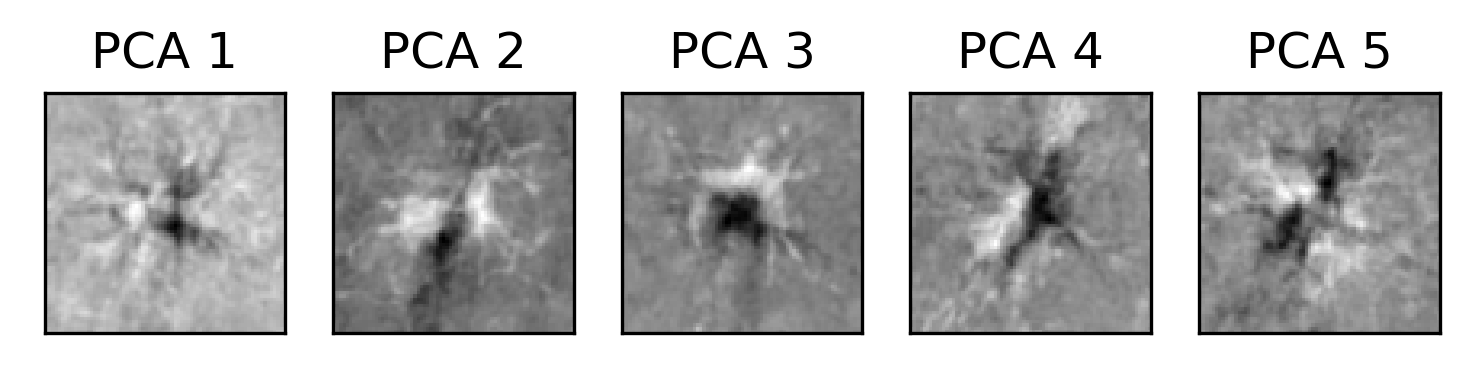

In [9]:
k=0
plt.figure(dpi=300)
for i in np.arange(5):
    k+= 1
    plt.subplot(1,5,k)
    plt.imshow(pca.components_[i].reshape((75,75)),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title("PCA %d" % (k))